In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt

## Why dataset is chosen
- Linearly separable vs Non Linear Separable to highlight each method +/-
- 100 vs 1k amount of data to see each method behaviour during hyperparameter tuning

### Dataset Analysis

In [2]:
def dataset_analysis(df, target_column_name, title, threshold=0):
    print("Dataset Balance")
    print(df[target_column_name].value_counts())
    columns = df.columns.values.tolist()
    columns.remove(target_column_name)
    X = df[columns]
    Y = df[target_column_name]
    ## PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    for i in Y.unique().tolist():
        tmp = np.array([x for x,y in zip(principalComponents,Y) if y == i])
        plt.scatter(tmp[:,0], tmp[:,1], label=i)
    plt.legend()
    plt.suptitle(title)
    plt.savefig(f"figures/{title}_PCA")
    print("Variance Retained Ratio:",sum(pca.explained_variance_ratio_))
    return df
    

### Titanic
Simple preprocessing is done for titanic dataset
- Dropping all non numbers column
- one hot encoding categorical column
- filling nans with column mean

Where 0 is No survived and 1 is Survived.

The dataset does provide test and validation set obtainable through internet scouring but for this exercise purposes, we will use and split the data ourselves based on the training data

In [3]:
df = pd.read_csv('datasets/titanic.csv')
df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Sex', "Embarked"])
df.Age = df.Age.fillna(df.Age.mean())

Dataset Balance
Survived
0    549
1    342
Name: count, dtype: int64
Variance Retained Ratio: 0.99886948684182


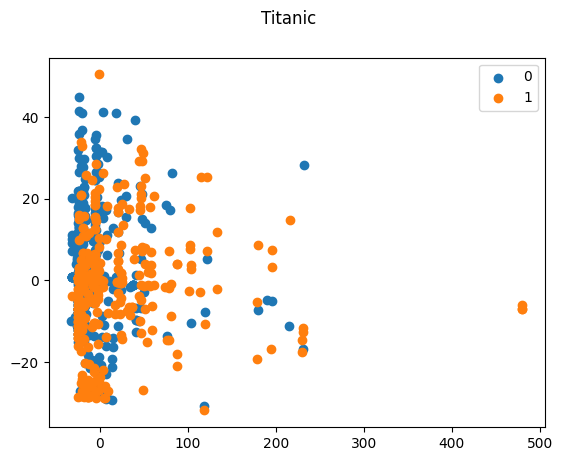

In [4]:
train_titanic = dataset_analysis(df, "Survived",title="Titanic")

### Iris
Same simple preprocessing is done for titanic dataset
- Dropping all non used columns

As we can see that iris dataset that i choose is specifically design to be balanced and linearly separable between 0 and 1
and almost linearly separable between 1 and 2.

Since the amount of data is super balanced and iris dataset does not have any test or validation split, we will need to split by ourselves as equally as well

In [5]:
df = pd.read_csv('datasets/iris.csv')
df = df.drop(["Id"],axis=1)
df.Species = df.Species.astype("category")
df.Species = df.Species.cat.codes

Dataset Balance
Species
0    50
1    50
2    50
Name: count, dtype: int64
Variance Retained Ratio: 0.9776317750248035


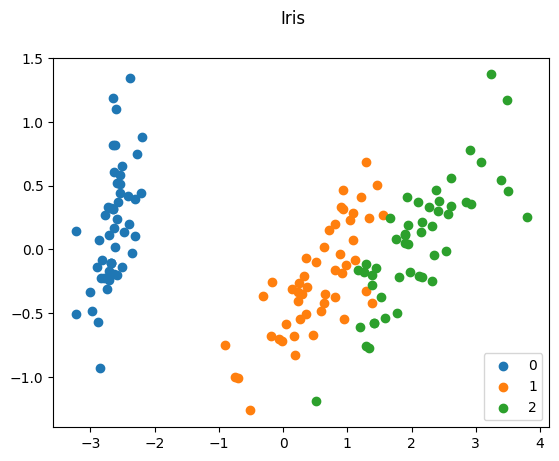

In [6]:
train_iris = dataset_analysis(df, "Species",title="Iris")